# Contexto comercial

El gerente de un banco esta molesto ya que cada dia mas y mas clientes estan dejando de usar los servicios de la tarjeta de credito.

Para evitar esto, el gerente nos contrato a nosotros para crear un modelo para poder predecir que cliente va a dejar de usar los servicios para asi poder proveerle un mejor servicio y descuentos para asi hacer cambiar de idea al cliente.

# Preguntas

- ¿Que cantidad de cuentas hay activas en el banco? ¿Cuantas cerradas?

- ¿Cual es el monto maximo de credito otorgado? ¿El minimo?

- ¿Hay alguna relacion entre los pedidos de credito y los ingresos anuales de los clientes?

- ¿Existe una diferencia en abandonos por su género?

- ¿Como se puede identificar a los clientes fieles? ¿Y a los que van a abandonar el banco?

- ¿Que rango de edad tienen los clientes?


# Diccionario de datos

CLIENTNUM: Numero unico identificador del cliente.

Attrition_Flag: Actividad del cliente, si la cuenta esta cerrada vale 1 sino 0.

Customer_Age: Edad del cliente.

Gender: Genero del cliente.

Dependent_count: Variable demografica, numero de dependencias.

Education_Level: Nivel de educacion maxima alcanzada del cliente.

Marital_Status: Estado civil del cliente. (casado/a, soltero/a, desconocido)

Income_Category: Ingresos anuales del cliente (<  40K, 40K - 60K,  60K− 80K,  80K− 120K, >)

Card_Category: Tipo de tarjeta que tiene el cliente (Blue, Silver, Gold, Platinum)

Monthsonbook: Periodo de relacion con el banco.

TotalRelationshipcount: Numero total de productos mantenidos por el cliente

MonthsInactive12_mon: N° de meses inactivos en los ultimos 12 meses.

ContactsCount12_mon: N° de contactos en los ultimos 12 meses.

Credit_Limit: Limite de la tarjeta de credito.

TotalRevolvingBal: Saldo rotatorio total en la tarjeta de credito

AvgOpenTo_Buy: Disponibilidad de comprar una linea de credito (porcentaje de los ultimos 12 meses)

TotalAmtChngQ4Q1: Cambio en el monto de la transacción (Q4 over Q1)

TotalTransAmt: Importe total de las transacciones (Ultimos 12 meses)

TotalTransCt: Recuento total de transacciones (Ultimos 12 meses)

TotalCtChngQ4Q1: Cambio en el monto de la transacción (Q4 over Q1)

AvgUtilizationRatio: Ratio de uso medio de la tarjeta.

NaiveBayesClassifier_attribution Naive Bayes: Clasificador bayesiano ingenuo.

# Configuración de dataset y líbrerias

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,classification_report

In [ ]:
banco = pd.read_csv('Banco.csv')

In [ ]:
banco.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
banco.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [ ]:
banco.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [ ]:
banco['Attrition_Flag'].replace(['Existing Customer','Attrited Customer'],[0,1],inplace=True)

¿Cuantas cuentas hay activas? ¿Cuantas cerradas?

Text(0.5, 0, 'Estado de la cuenta')

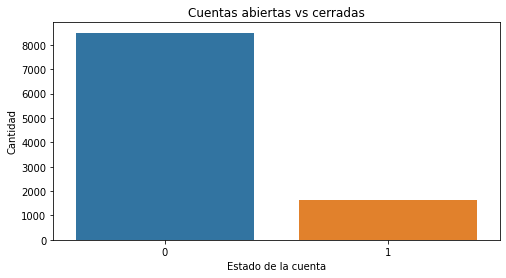

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(banco['Attrition_Flag'])
ax.set_title('Cuentas abiertas vs cerradas')
ax.set_ylabel('Cantidad')
ax.set_xlabel('Estado de la cuenta')

¿Cuantas mujeres tienen una cuenta? ¿Y hombres?

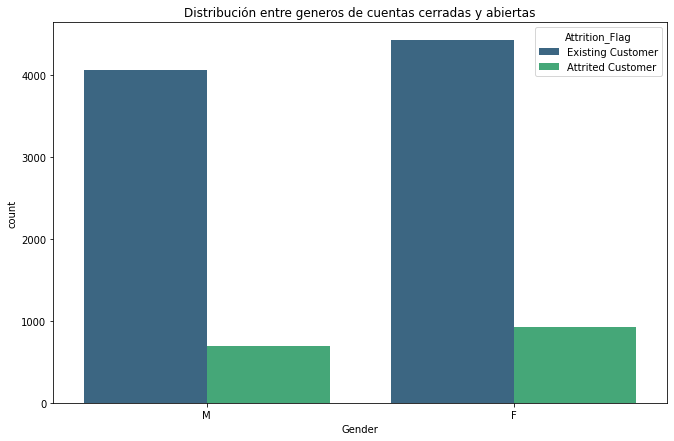

In [ ]:
fig, ax = plt.subplots(figsize=(11,7))
sns.countplot(x='Gender', hue='Attrition_Flag', palette='viridis', data=banco)
plt.title("Distribución entre generos de cuentas cerradas y abiertas")
plt.show()

¿Que tipo de educación tienen los clientes?

Text(0.5, 0, 'Educación')

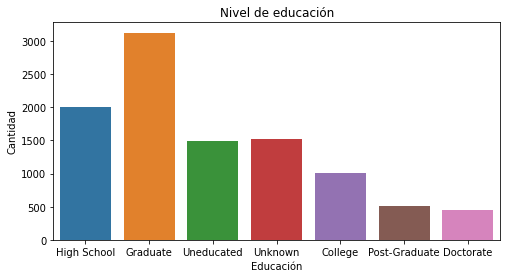

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(banco['Education_Level'])
ax.set_title('Nivel de educación')
ax.set_ylabel('Cantidad')
ax.set_xlabel('Educación')

- Podemos observar que la moyoria de los clientes tienen una educación secundaria completa.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Ingresos')

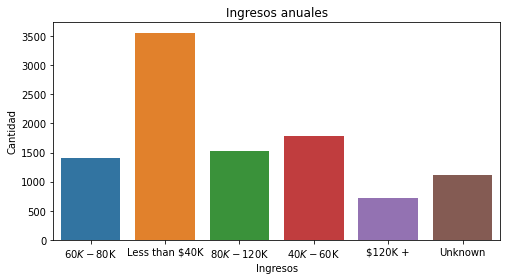

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(banco['Income_Category'])
ax.set_title('Ingresos anuales')
ax.set_ylabel('Cantidad')
ax.set_xlabel('Ingresos')

- La mayoria de los clientes tiene un ingreso menor a $40 K, esto nos puede dar un indicio de que al tener menores ingresos, solicitan mas creditos

¿Cual es el rango de edad que tienen los clientes ?

Text(0.5, 0, 'Edad')

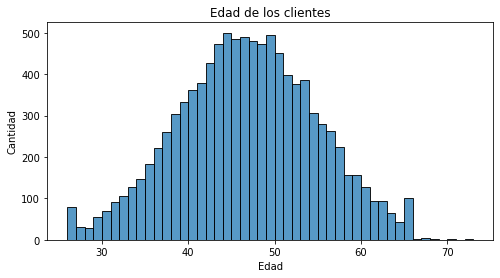

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
sns.histplot(data= banco, x="Customer_Age")
ax.set_title('Edad de los clientes')
ax.set_ylabel('Cantidad')
ax.set_xlabel('Edad')

- Podemos observar que hay mas clientes de entre 40 y 50 años.

¿Cuanto tiempo hace que son clientes en el banco?

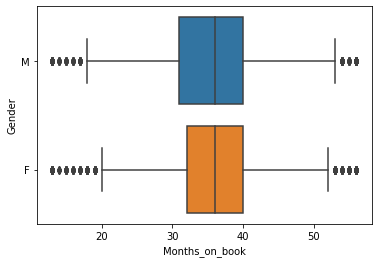

In [ ]:
sns.boxplot(x="Months_on_book", y="Gender", data=banco)

- Podemos observar que la mayoria de clientes estan hace mas de 30 años en el banco.

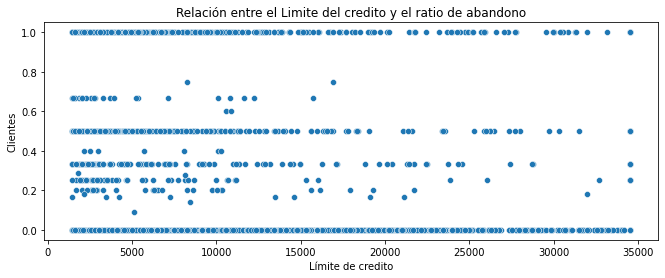

In [ ]:
fig, ax = plt.subplots(figsize=(11,4))
sns.scatterplot(x=banco['Credit_Limit'],y=banco.groupby('Credit_Limit').Attrition_Flag.mean())
plt.title("Relación entre el Limite del credito y el ratio de abandono")
plt.ylabel("Clientes")
plt.xlabel("Límite de credito")
plt.show()

# Correlación

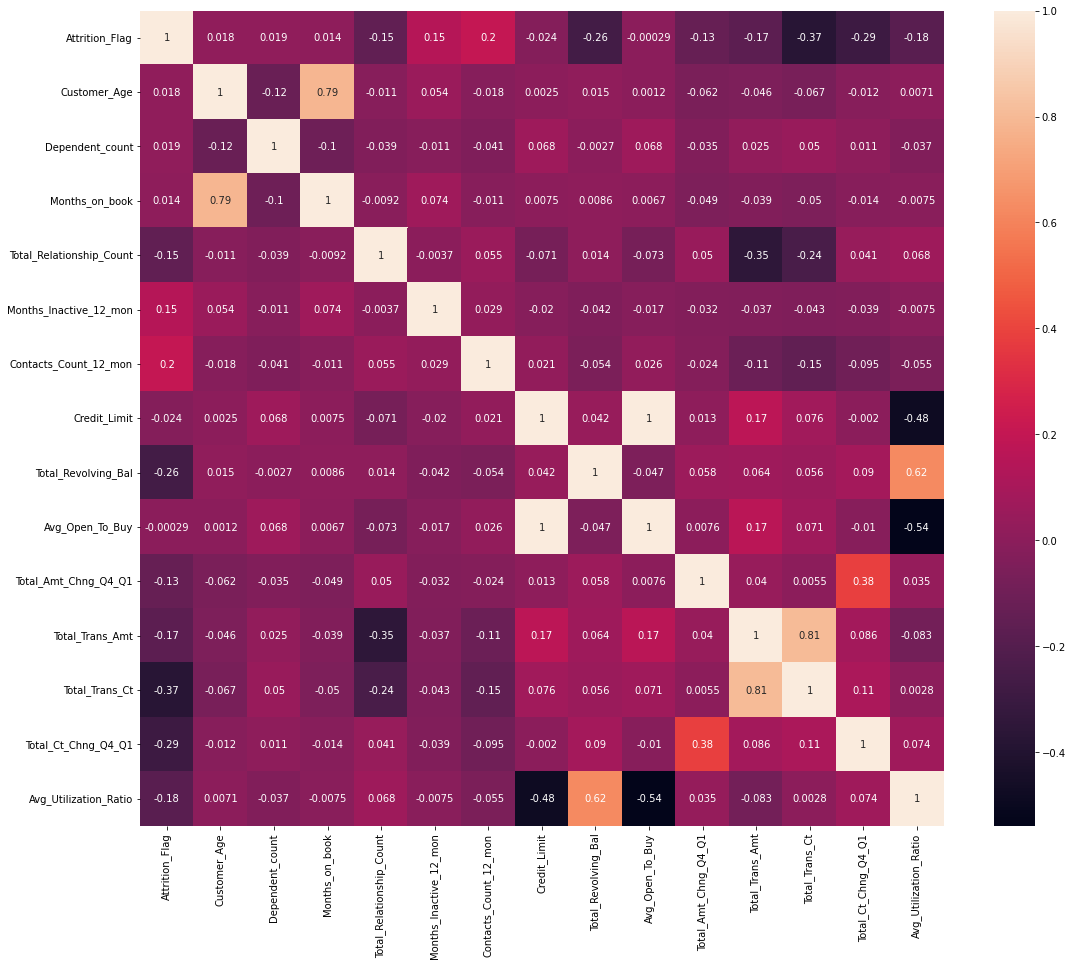

In [ ]:
plt.figure(figsize=(18,15))
sns.heatmap(banco.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1).corr(), annot=True)
plt.show()

- Podemos observar que hay muchas variables que se correlacionan entre si.

- Total_Trans_Ant y Total_Trans_Ct.
- Avg_Open_To_Buy y Credit_Limit.
- Months_On_Book y Costumer_Age

# Modelado de Datos

In [ ]:
banco['Gender'].replace(['F','M'],[0,1],inplace=True)

banco['Education_Level'].replace(['Graduate','College', 'Unknown','Uneducated','High School','Post-Graduate','Doctorate'],[0,1,2,3,4,5,6],inplace=True)

banco['Marital_Status'].replace(['Married','Unknown','Single','Divorced'],[0,1,2,3],inplace=True)

banco['Income_Category'].replace(['Unknown','Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +'],[0,1,2,3,4,5],inplace=True)

banco['Card_Category'].replace(['Blue','Silver','Gold','Platinum'],[0,1,2,3],inplace=True)

banco.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2','CLIENTNUM','Avg_Open_To_Buy'],axis='columns',inplace=True)

In [ ]:
banco.sample(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
5578,0,53,0,3,5,3,0,0,48,5,2,2,12286.0,997,0.726,4960,83,0.729,0.081
1859,0,36,1,0,1,0,4,0,27,3,3,2,6338.0,2379,0.624,1715,39,0.500,0.375
2970,0,49,1,3,0,0,1,0,36,3,3,5,2976.0,1817,0.739,3332,60,0.667,0.611
6875,0,53,1,4,0,2,2,0,36,4,5,3,2300.0,0,0.655,4527,79,0.756,0.000
4305,0,56,0,2,0,3,1,0,45,4,2,4,1960.0,1690,0.630,3870,67,0.558,0.862


In [ ]:
X = banco.drop('Attrition_Flag',axis='columns')
y = banco['Attrition_Flag']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.20,random_state=0)

Regresion Logística

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#Build logistic regression pipeline
log_pipe = Pipeline([('imputer',IterativeImputer(random_state=0)),('scaler',StandardScaler()),
                    ('logreg',LogisticRegression())])

#cross validate logistic regression model
print(f"Cross validation score for Logistic Regression: {np.mean(cross_val_score(log_pipe, X_train, y_train, scoring='f1'))}")

Cross validation score for Logistic Regression: 0.6674576173905038


Test score for Logistic Regression: 0.6473988439306358
Training score for Logistic Regression: 0.6748522055479763


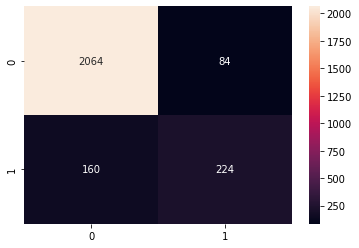

In [ ]:
log_pipe.fit(X_train,y_train)

print(f"Test score for Logistic Regression: {f1_score(y_test, log_pipe.predict(X_test))}")
print(f"Training score for Logistic Regression: {f1_score(y_train, log_pipe.predict(X_train))}")
log_mat = confusion_matrix(y_test, log_pipe.predict(X_test))

sns.heatmap(log_mat, annot=True,fmt="g")
plt.show()

XGBoost

In [ ]:
xgb_pipe = Pipeline([('imputer',IterativeImputer(random_state=0)),('scaler',StandardScaler()),
                    ('xgb',XGBClassifier(verbosity=0,use_label_encoder=False))])

#Cruzamos para validar el modelo del XGBoost
print(f"Cross validation score for XGBoost: {np.mean(cross_val_score(xgb_pipe, X_train, y_train, scoring='f1'))}")

Cross validation score for XGBoost: 0.8864410155145583


Test score for XGBoost: 0.88
Training score for XGBoost: 0.920250521920668


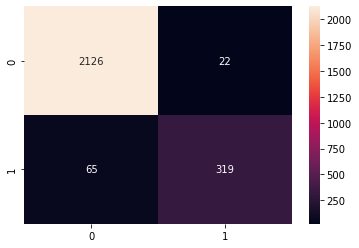

In [ ]:
# Usamos XGBoost pipeline para predecir variables de prueba y entrenamiento  

xgb_pipe.fit(X_train,y_train)
print(f"Test score for XGBoost: {f1_score(y_test, xgb_pipe.predict(X_test))}")
print(f"Training score for XGBoost: {f1_score(y_train, xgb_pipe.predict(X_train))}")

xgb_mat = confusion_matrix(y_test, xgb_pipe.predict(X_test))
sns.heatmap(xgb_mat, annot=True, fmt="g")
plt.show()

# Conclusión

- Despues de armar los modelos, podemos concluir que XGBoost es el que tiene mejor performance con una prueba de f1-score de 88%, por lo tanto basaremos nuestros analisis en la matriz de confusión de este.

- Con el tiempo, actualizaremos este dataset para asi poder tener mas data para analizar y mejorar nuestro modelo y hacerlo mas preciso.